In [1]:
#ref: https://machinelearningmastery.com/how-to-control-neural-network-model-capacity-with-nodes-and-layers/

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from numpy import where

In [3]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value

In [4]:
X

array([[  0.48719811,  -0.43160548],
       [ -1.48958879,  -3.47915742],
       [ -2.06250444,  -7.73300419],
       ...,
       [ -4.4839941 ,  -3.17623663],
       [ -1.92705839,   2.94801349],
       [ -2.32988529, -10.66109273]])

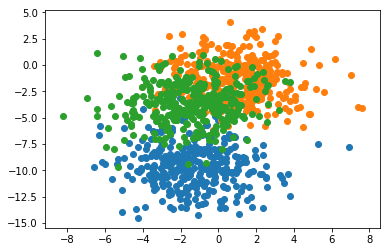

In [5]:
for i in range(3):
    row_ix = where(y==i)
    pyplot.scatter(X[row_ix,0], X[row_ix,1])
pyplot.show()

### standard deviation of 2.0 means that the classes are not linearly separable (separable by a line), causing many ambiguous points. This is desirable as it means that the problem is non-trivial and will allow a neural network model to find many different “good enough” candidate solutions.

### In order to explore model capacity, we need more complexity in the problem than three classes and two variables.

For the purposes of the following experiments, we will use 100 input features and 20 classes; for example:

In [6]:
X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)

In [ ]:
# MLP - multi-layer perceptron

In [ ]:
# study of mlp learning curves given different number of nodes for multi-class classification
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# prepare multi-class classification dataset
def create_dataset():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
	# configure the model based on the data
	n_input, n_classes = trainX.shape[1], testy.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(n_classes, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model on train set
	history = model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate model on test set
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return history, test_acc

# prepare dataset
trainX, trainy, testX, testy = create_dataset()
# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7]
for n_nodes in num_nodes:
	# evaluate model with a given number of nodes
	history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
	# summarize final test set accuracy
	print('nodes=%d: %.3f' % (n_nodes, result))
	# plot learning curve
	pyplot.plot(history.history['loss'], label=str(n_nodes))
# show the plot
pyplot.legend()
pyplot.show()

Using TensorFlow backend.


nodes=1: 0.150


A line plot is also created showing cross entropy loss on the training dataset for each model configuration (1 to 7 nodes in the hidden layer) over the 100 training epochs.

We can see that as the number of nodes is increased, the model is able to better decrease the loss, e.g. to better learn the training dataset. This plot shows the direct relationship between model capacity, as defined by the number of nodes in the hidden layer and the model’s ability to learn.

The number of nodes can be increased to the point (e.g. 1,000 nodes) where the learning algorithm is no longer able to sufficiently learn the mapping function.

In [ ]:

# study of mlp learning curves given different number of layers for multi-class classification
from sklearn.datasets.samples_generator import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD`a
from keras.utils import to_categorical
from matplotlib import pyplot
 
# prepare multi-class classification dataset
def create_dataset():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy
 
# fit model with given number of layers, returns test set accuracy
def evaluate_model(n_layers, trainX, trainy, testX, testy):
	# configure the model based on the data
	n_input, n_classes = trainX.shape[1], testy.shape[1]
	# define model
	model = Sequential()
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	for _ in range(1, n_layers):
		model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(n_classes, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate model on test set
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return history, test_acc
 
# get dataset
trainX, trainy, testX, testy = create_dataset()
# evaluate model and plot learning curve of model with given number of layers
all_history = list()
num_layers = [1, 2, 3, 4, 5]
for n_layers in num_layers:
	# evaluate model with a given number of layers
	history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
	print('layers=%d: %.3f' % (n_layers, result))
	# plot learning curve
	pyplot.plot(history.history['loss'], label=str(n_layers))
pyplot.legend()
pyplot.show()

In this case, we can see that the model is capable of learning the problem well with up to three layers, then begins to falter. We can see that performance really drops with five layers and is expected to continue to fall if the number of layers is increased further.

A line plot is also created showing cross entropy loss on the training dataset for each model configuration (1 to 5 layers) over the 100 training epochs.

We can see that the dynamics of the model with 1, 2, and 3 models (blue, orange and green) are pretty similar, learning the problem quickly.

Surprisingly, training loss with four and five layers shows signs of initially doing well, then leaping up, suggesting that the model is likely stuck with a sub-optimal set of weights rather than overfitting the training dataset.